<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.7.6) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/r/osx-64            [>                   ] (--:--) No change
pkgs/r/osx-64    

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [42]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tesla=yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
tesla_data=tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
tesla_data.reset_index(inplace=True)

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [8]:
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

Parse the html data using `beautiful_soup`.


In [31]:
beautiful_soup=BeautifulSoup(html_data,"html5lib")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [21]:
read_html_pandas_data=pd.read_html(url)
tesla_revenue=read_html_pandas_data[0]
tesla_revenue.rename(columns={'Tesla Annual Revenue(Millions of US $)':"Date", 'Tesla Annual Revenue(Millions of US $).1':"Revenue"},inplace=True)
tesla_revenue.head()

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [23]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.head()

/var/folders/f0/whgq64z93c70dhrcd59qsyxh0000gn/T/ipykernel_1140/2194971632.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


Execute the following lines to remove an null or empty strings in the Revenue column.


In [24]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [26]:
gamestop=yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [28]:
gme_data=gamestop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [29]:
gme_data.reset_index(inplace=True)

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [33]:
html_data=requests.get("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue").text

Parse the html data using `beautiful_soup`.


In [34]:
beautiful_soup=BeautifulSoup(html_data,"html5lib")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [37]:
read_html_pandas_data=pd.read_html("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue")
gme_revenue=read_html_pandas_data[0]
gme_revenue.rename(columns={'GameStop Annual Revenue(Millions of US $)':"Date", 'GameStop Annual Revenue(Millions of US $).1':"Revenue"},inplace=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.head()

/var/folders/f0/whgq64z93c70dhrcd59qsyxh0000gn/T/ipykernel_1140/1286556727.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")


,Date,Revenue
0,2021,5090
1,2020,6466
2,2019,8285
3,2018,8547
4,2017,7965


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [38]:
gme_revenue.tail()

,Date,Revenue
8,2013,8887
9,2012,9551
10,2011,9474
11,2010,9078
12,2009,8806


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


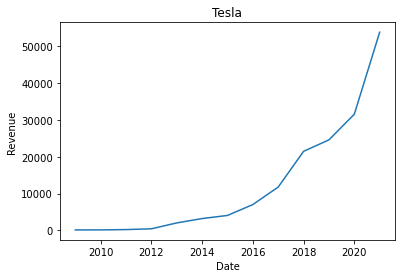

In [80]:
#make_graph(tesla_data,tesla_revenue,"Tesla"): function not working appropriately.
tesla_revenue["Revenue"]=tesla_revenue["Revenue"].astype(float)
tesla_revenue.head()
plt.plot(tesla_revenue["Date"],tesla_revenue["Revenue"])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Tesla")
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


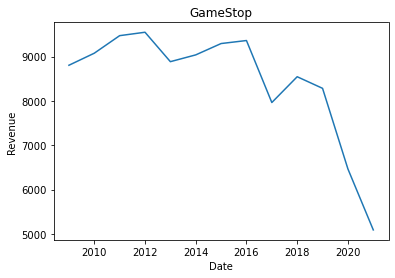

In [81]:
#make_graph(gme_data,gme_revenue,'GameStop') not working properly.
gme_revenue["Revenue"]=gme_revenue["Revenue"].astype(float)
plt.plot(gme_revenue["Date"],gme_revenue["Revenue"])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("GameStop")
plt.show()

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
